In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"C:\Users\gaura\Documents\data\cleaned_data.csv")

In [24]:
data['bp_lo'].max()

120.0

In [25]:
data.head()

,id,Age,gender,height,weight,bp_high,bp_lo,cholesterol,gluc,diabetic,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80.0,1,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90.0,3,1,3,0,0,1,1
2,2,52,1,165,64.0,130,70.0,3,1,3,0,0,0,1
3,3,48,2,169,82.0,150,100.0,1,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60.0,1,1,1,0,0,0,0


In [26]:
print(data["bp_lo"].describe())
print(data["bp_lo"].isnull().sum())
print(data["bp_lo"].dtypes)

count    68626.000000
mean        81.304797
std          9.355849
min         50.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        120.000000
Name: bp_lo, dtype: float64
1114
float64


In [27]:
m_bp_lo = data.loc[:, 'bp_lo'].mean()
m_round=round(m_bp_lo,-1)
print(m_round)

80.0


In [28]:
np.where(pd.isnull(data))

(array([  227,   240,   259, ..., 69618, 69625, 69707], dtype=int64),
 array([6, 6, 6, ..., 6, 6, 6], dtype=int64))

In [29]:
data['bp_lo'].fillna(value=m_round, inplace=True)
print('Updated Dataframe:')
print(data)

Updated Dataframe:
          id  Age  gender  height  weight  bp_high   bp_lo  cholesterol  gluc  \
0          0   50       2     168    62.0       110   80.0            1     1   
1          1   55       1     156    85.0       140   90.0            3     1   
2          2   52       1     165    64.0       130   70.0            3     1   
3          3   48       2     169    82.0       150  100.0            1     1   
4          4   48       1     156    56.0       100   60.0            1     1   
...      ...  ...     ...     ...     ...       ...    ...          ...   ...   
69735  99993   53       2     168    76.0       120   80.0            1     1   
69736  99995   62       1     158   126.0       140   90.0            2     2   
69737  99996   52       2     183   105.0       180   90.0            3     1   
69738  99998   61       1     163    72.0       135   80.0            1     2   
69739  99999   56       1     170    72.0       120   80.0            2     1   

       d

In [30]:
data.to_csv("lets see.csv")

In [31]:
corr=data["bp_lo"]. corr(data["cardio"])
print(corr)

0.33602422578365915


In [32]:
c=data["bp_lo"]. corr(data["active"])
print(c)

-0.0014351648787064419


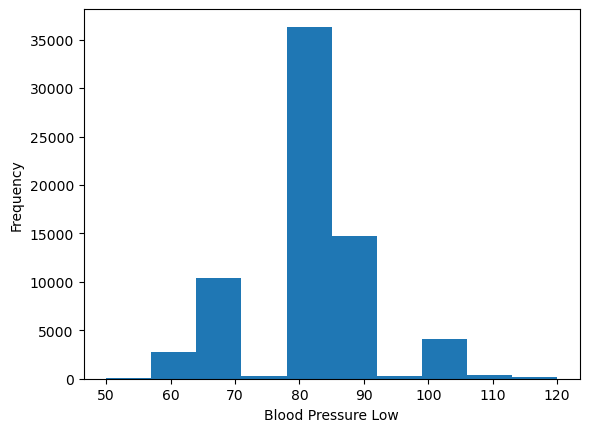

In [33]:
plt.hist(data["bp_lo"])
plt.xlabel('Blood Pressure Low')
plt.ylabel('Frequency')
plt.title('')
plt.show()

In [34]:
print("Original DataFrame:")
print(data["bp_lo"])
print()

#  Min-Max Scaling
def min_max_scaling(df, column_name):
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    df[column_name] = (df[column_name] - min_value) / (max_value - min_value)

min_max_scaling(data,"bp_lo" )

print("DataFrame after Min-Max Scaling:")
print(data["bp_lo"])
print()

Original DataFrame:
0         80.0
1         90.0
2         70.0
3        100.0
4         60.0
         ...  
69735     80.0
69736     90.0
69737     90.0
69738     80.0
69739     80.0
Name: bp_lo, Length: 69740, dtype: float64

DataFrame after Min-Max Scaling:
0        0.428571
1        0.571429
2        0.285714
3        0.714286
4        0.142857
           ...   
69735    0.428571
69736    0.571429
69737    0.571429
69738    0.428571
69739    0.428571
Name: bp_lo, Length: 69740, dtype: float64



In [35]:
correlation_matrix = data[['bp_lo', 'cardio', 'active']].corr()
correlation_matrix

,bp_lo,cardio,active
bp_lo,1.000000,0.336024,-0.001435
cardio,0.336024,1.000000,-0.035784
active,-0.001435,-0.035784,1.000000


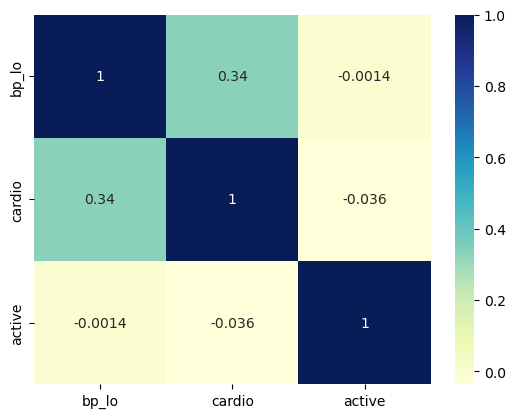

In [36]:
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True) 
plt.show() 